<a href="https://colab.research.google.com/github/Sambasivabanki/Stress-Detection-Through-Sleep-Using-MachineLearning-Project/blob/main/stress_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data
df=pd.read_csv('/content/stress.csv')


In [ ]:
df.columns

Index(['snoring rate', 'Respiraton rate', 'Body Temparature', 'Limb movement',
       'Blood oxygen ', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [ ]:
df.shape

(630, 9)

In [ ]:
# Print data types for each variable
df.dtypes

snoring rate        float64
Respiraton rate     float64
Body Temparature    float64
Limb movement       float64
Blood oxygen        float64
eye movement        float64
sleeping hours      float64
heart rate          float64
stress level          int64
dtype: object

In [ ]:
df.head()

,snoring rate,Respiraton rate,Body Temparature,Limb movement,Blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Univariate Analysis

In [ ]:
df['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions instead of number
df['stress level'].value_counts(normalize=True)

stress level
3    0.2
1    0.2
0    0.2
2    0.2
4    0.2
Name: proportion, dtype: float64

<Axes: xlabel='stress level'>

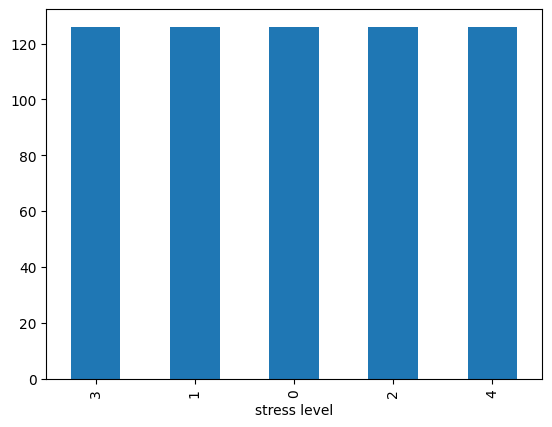

In [ ]:
# plotting the bar plot of frequencies
df['stress level'].value_counts().plot.bar()

<Axes: xlabel='Body Temparature', ylabel='Density'>

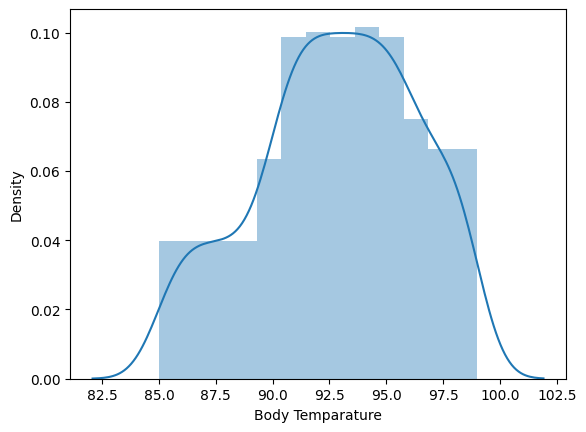

In [ ]:
sn.distplot(df['Body Temparature'])

<Axes: xlabel='heart rate'>

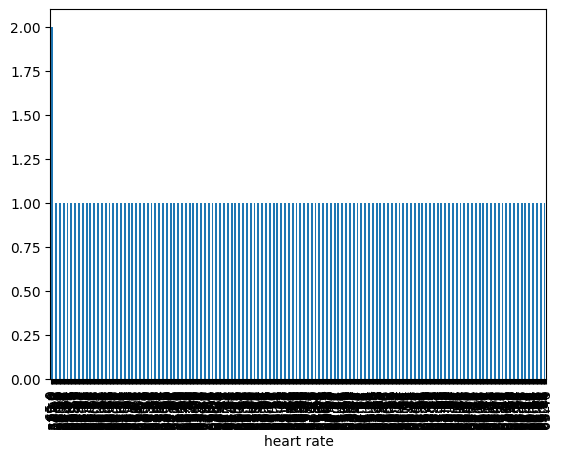

In [ ]:
df['heart rate'].value_counts().plot.bar()



``
# Bivariate Analysis
```



stress level  0  1  2  3  4
heart rate                 
50.00         1  0  0  0  0
50.04         1  0  0  0  0
50.08         1  0  0  0  0
50.12         1  0  0  0  0
50.16         1  0  0  0  0
...          .. .. .. .. ..
84.68         0  0  0  0  1
84.76         0  0  0  0  1
84.84         0  0  0  0  1
84.92         0  0  0  0  1
85.00         0  0  0  0  1

[626 rows x 5 columns]


Text(0, 0.5, 'Percentage')

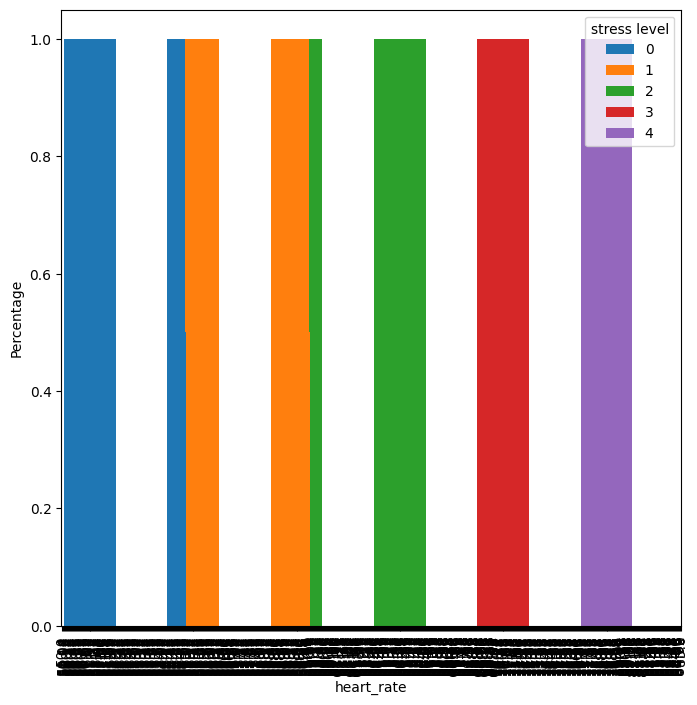

In [ ]:
print(pd.crosstab(df['heart rate'],df['stress level']))

heart_rate=pd.crosstab(df['heart rate'],df['stress level'])
heart_rate.div(heart_rate.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('heart_rate')
plt.ylabel('Percentage')

stress level      0  1  2  3  4
Body Temparature               
85.000            0  0  0  0  1
85.040            0  0  0  0  1
85.080            0  0  0  0  1
85.120            0  0  0  0  1
85.160            0  0  0  0  1
...              .. .. .. .. ..
98.904            1  0  0  0  0
98.928            1  0  0  0  0
98.952            1  0  0  0  0
98.976            1  0  0  0  0
99.000            1  0  0  0  0

[626 rows x 5 columns]


Text(0, 0.5, 'Percentage')

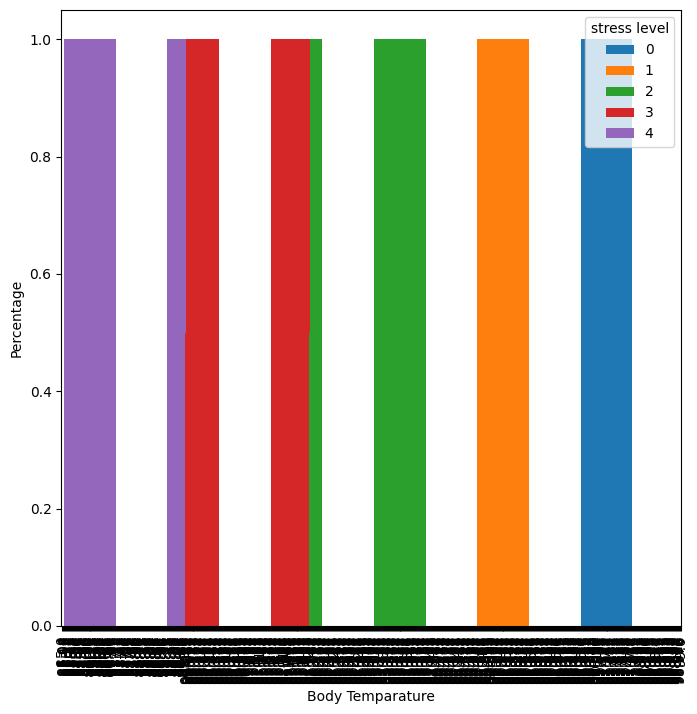

In [ ]:
print(pd.crosstab(df['Body Temparature'],df['stress level']))

default=pd.crosstab(df['Body Temparature'],df['stress level'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Body Temparature')
plt.ylabel('Percentage')

In [ ]:
numeric_train = df.select_dtypes(include=['float64', 'int64'])

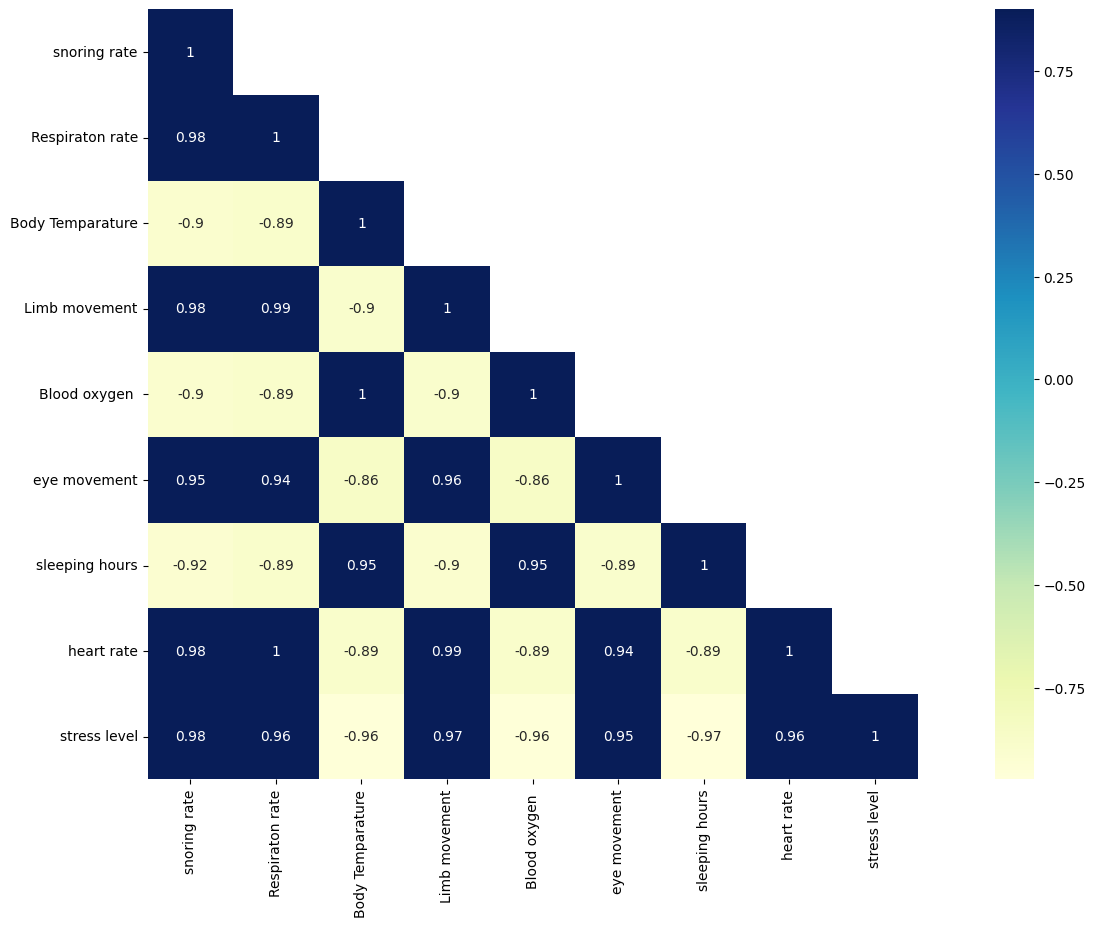

In [ ]:
corr = numeric_train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")
plt.show()

Next we will look into into missing values in the data set

In [ ]:
df.isnull().sum()

snoring rate        0
Respiraton rate     0
Body Temparature    0
Limb movement       0
Blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64


There are no missing values in the train dataset.
Next, we will start to build our predictive model to predict whether a person feeling stress or not.



```


```
# Model Buliding
```

```



In [ ]:
x=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)



```


```
# Logistic Regression
```


```



In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

1.0




```


```
# KNN-CLASSIFIER
```


```



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

1.0




```
`

```
# Random Forest classifier
```


```



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

0.9894179894179894




```


```
# Naive Bayes classifier
```


```



In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

1.0




```


```
# support vector classifier
```


```



In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

0.9841269841269841




```


```
# stochastic Gradient Descent classifier
```


```



In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train,y_train)

SGDClassifier()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

0.7407407407407407
